**PROJETO DE ICD**

TEMA: Fórmula 1 (grupo 8)

Alunos: Kayque Meira Siqueira, Paula D'agostini Alvares Maciel e Rubens da Cunha Castro

Esse trabalho consistiu na coleta de dados referentes a temática envolvida, a análise e exploração dos dados, o teste de hipóteses e a geração de um modelo para prever propriedades/atributos que caracterizam um possível campeão da modalidade.

Inicialmente, os dados coletados foram carregados no github do projeto (link abaixo) e estão sendo lidos nesse notebook. No total temos 38 conjuntos de dados que apresentam as mais diversas informações sobre a modalidade Fórmula 1 com dados desde seu início, em 1950, até o ano de 2023.

GITHUB DO PROJETO: https://github.com/RCastro13/ICD-Projeto

Para facilitar o nosso entendimento e para realizar um mapeamento dos dados foi criado um documento para funcionar como dicionário dos dados e facilitar o entendimento de cada tabela da base e compreensão sobre quais colunas servem como chaves estrangeiras.

Esse documento pode ser acessado pelo link:

https://docs.google.com/document/d/1ZoZDDBM-eJ4OcydAzhposUuwpq9DKgr1wKl6obUVawY/edit?usp=sharing

Em seguida estão todos os códigos e visualizações geradas, assim como comentários do grupo sobre o entendimento de cada etapa aplicada

**As visualizações foram geradas utilizando matplotlib + seaborn**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations

In [ ]:
# URLs dos arquivos CSV no GitHub
dfCircuits = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-circuits.csv')
dfConstructorsPreviousNextConstructors = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-constructors-previous-next-constructors.csv')
dfConstructors = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-constructors.csv')
dfContinents = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-continents.csv')
dfCountries = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-countries.csv')
dfDriversFamilyRelationships = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-drivers-family-relationships.csv')
dfDrivers = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-drivers.csv')
dfEngineManufacturers = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-engine-manufacturers.csv')
dfEntrants = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-entrants.csv')
dfGrandPrix = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-grands-prix.csv')
dfRacesConstructorStandings = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-constructor-standings.csv')
dfRacesDriverOfTheDayResults = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-driver-of-the-day-results.csv')
dfRacesDriverStandings = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-driver-standings.csv')
dfRacesFastestLaps = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-fastest-laps.csv')
dfFreePractice1Results = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-free-practice-1-results.csv')
dfFreePractice2Results = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-free-practice-2-results.csv')
dfFreePractice3Results = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-free-practice-3-results.csv')
dfFreePractice4Results = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-free-practice-4-results.csv')
dfRacesPitStops = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-pit-stops.csv')
dfRacesPreQualifyingResults = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-pre-qualifying-results.csv')
dfQualifying1Results = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-qualifying-1-results.csv')
dfQualifying2Results = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-qualifying-2-results.csv')
dfRacesQualifyingResults = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-qualifying-results.csv')
dfRacesRaceResults = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-race-results.csv')
dfRacesSprintQualifyingResults = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-sprint-qualifying-results.csv')
dfRacesSprintRaceResults = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-sprint-race-results.csv')
dfRacesSprintStartingGridPositions = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-sprint-starting-grid-positions.csv')
dfRacesStartingGridPositions = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-starting-grid-positions.csv')
dfRacesWarmingUpResults = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races-warming-up-results.csv')
dfRaces = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-races.csv')
dfSeasonsConstructorStandings = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-seasons-constructor-standings.csv')
dfSeasonsDriverStandings = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-seasons-driver-standings.csv')
dfSeasonsEntrantsConstructors = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-seasons-entrants-constructors.csv')
dfSeasonsEntrantsDrivers = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-seasons-entrants-drivers.csv')
dfSeasonsEntrantsTyreManufacturers = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-seasons-entrants-tyre-manufacturers.csv')
dfSeasonsEntrants = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-seasons-entrants.csv')
dfSeasons = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-seasons.csv')
dfTyreManucturers = pd.read_csv('https://raw.githubusercontent.com/RCastro13/ICD-Projeto/main/csvFiles/onlyf1-db-tyre-manufacturers.csv')

A partir daqui começa o nossa busca pelo entendimento da base e os melhores atributos a serem explorados

               mediaDeParticipantesPorTemporada
continentId                                    
asia                                   2.037037
australia                              1.318182
europe                                21.323529
north-america                          1.760000
south-america                          3.642857


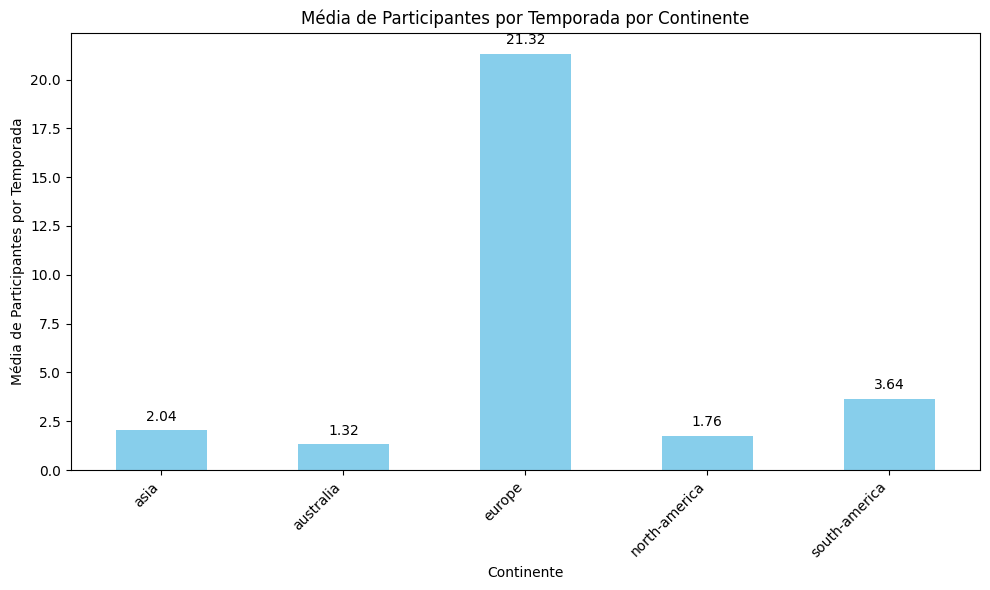

In [ ]:
#Gráfico para média dos participantes de cada continente ao longo dos anos (1950-2023)

dfCountries.columns
dfNewSeasons = dfSeasons.query('year >= 1990')
listaDeAnos = dfNewSeasons['year'].to_numpy()
allData = None

dfParticipantes = dfSeasonsEntrantsDrivers.query("roundsText.notna() or testDriver != True")

for ano in listaDeAnos:
  dfnew = dfParticipantes.query(f"year == {ano}")
  df1950_with_info = pd.merge(dfnew, dfDrivers, how='left', left_on='driverId', right_on='id')
  df1950_with_info_country = pd.merge(df1950_with_info, dfCountries, how='left', left_on='countryOfBirthCountryId', right_on='id')
  df1950_with_info_country_result = df1950_with_info_country.groupby("continentId").count()
  allData = pd.concat([allData, df1950_with_info_country_result])

allDataFiltered = allData.groupby("continentId")

dfMedia = allDataFiltered[['driverId']].mean()

dfResultado = dfMedia.rename(columns={'driverId': 'mediaDeParticipantesPorTemporada'})
print(dfResultado)

plt.figure(figsize=(10, 6))  # Define o tamanho da figura
dfResultado['mediaDeParticipantesPorTemporada'].plot(kind='bar', color='skyblue')

plt.title('Média de Participantes por Temporada por Continente')
plt.xlabel('Continente')
plt.ylabel('Média de Participantes por Temporada')

for index, value in enumerate(dfResultado['mediaDeParticipantesPorTemporada']):
    plt.text(index, value + 0.5, round(value, 2), ha='center')

plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhorar a legibilidade
plt.tight_layout()  # Ajusta o layout para evitar cortes nos rótulos
plt.show()

Percebe-se uma margem de participação dos europeus muito maior do que dos outros continentes.

C:\Users\kayqu\AppData\Local\Temp\ipykernel_26384\2173645939.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, y=y_column, x=x_column, data=df, palette='viridis')
C:\Users\kayqu\AppData\Local\Temp\ipykernel_26384\2173645939.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, y=y_column, x=x_column, data=df, palette='viridis')


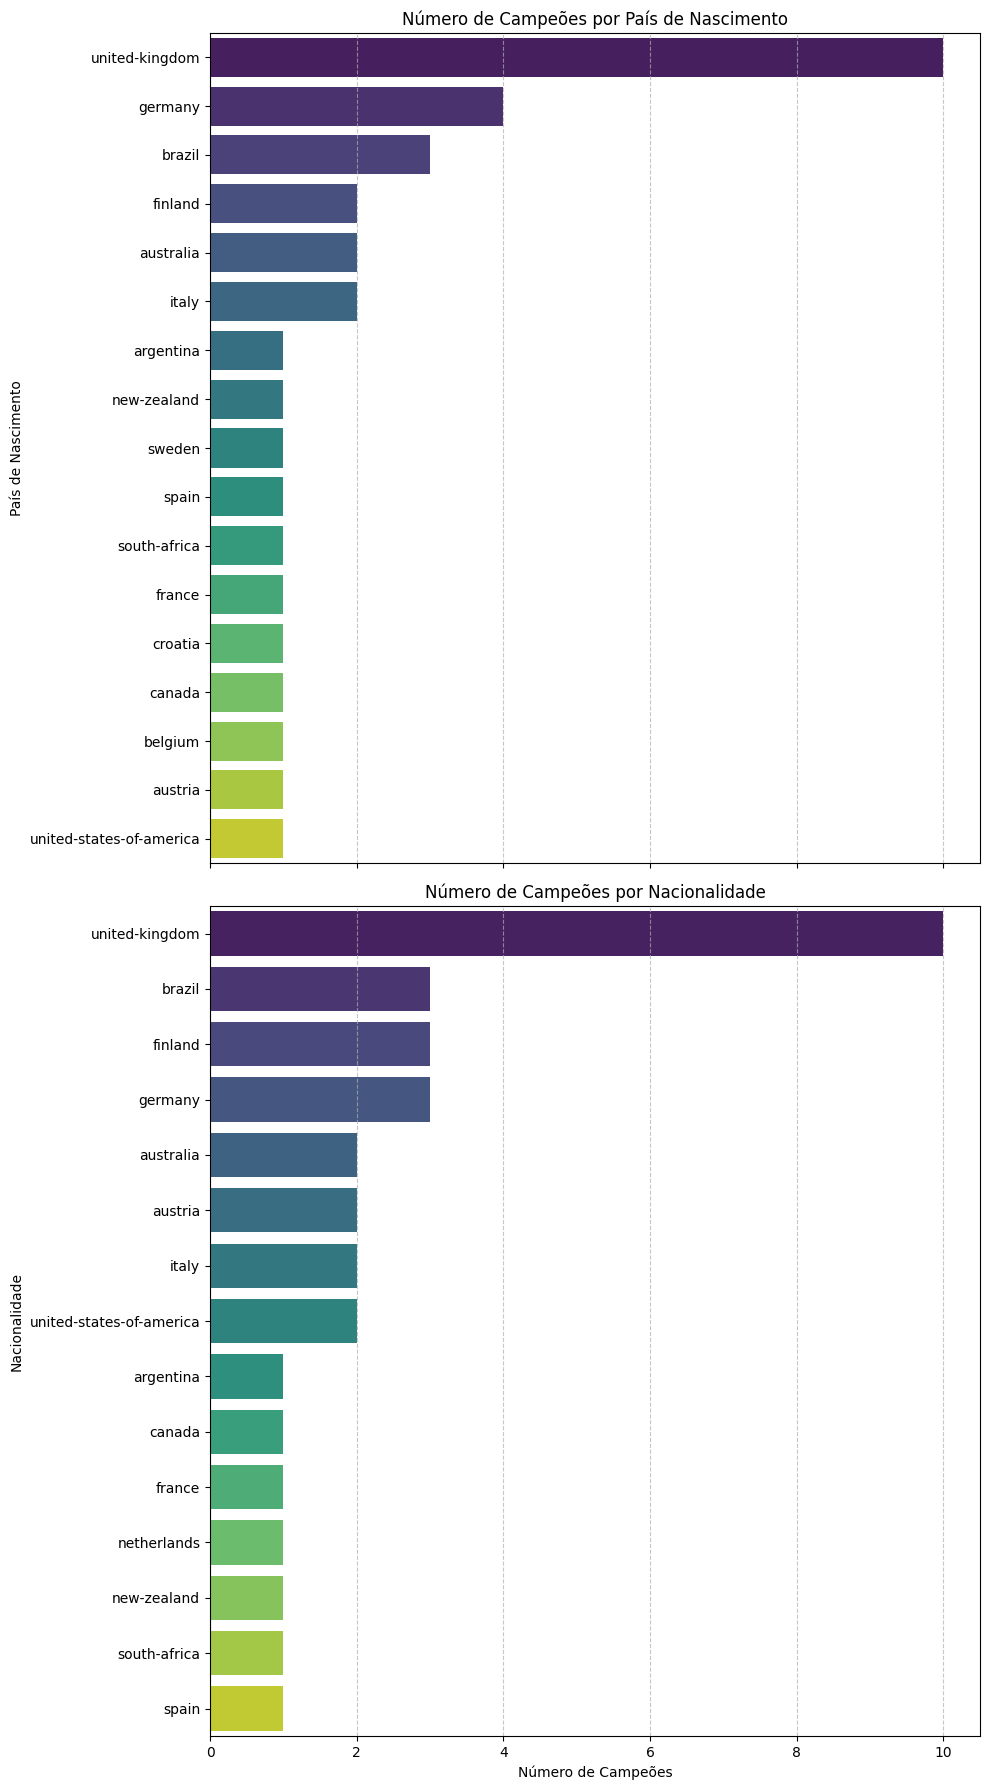

In [ ]:
# Nacionalidade dos campeões (o parametro segunda nacionalidade parece vazio em todas)

dfCampeao = dfDrivers.query("totalChampionshipWins >= 1")
dfWinnersNacional = pd.merge(dfCampeao, dfCountries, how='left', left_on='countryOfBirthCountryId', right_on='id')
df = dfWinnersNacional[['name_x','countryOfBirthCountryId', 'nationalityCountryId', 'secondNationalityCountryId']]

dfCountryOfBirth = df.groupby('countryOfBirthCountryId').size().reset_index(name='count')
dfNationality = df.groupby('nationalityCountryId').size().reset_index(name='count')
#dfSecondNationality = df.groupby('secondNationalityCountryId').size().reset_index(name='count')

dfCountryOfBirth = dfCountryOfBirth.sort_values(by='count', ascending=False)
dfNationality = dfNationality.sort_values(by='count', ascending=False)
#dfSecondNationality = dfSecondNationality.sort_values(by='count', ascending=False)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 18), sharex=True)

def plot_horizontal_bar_chart(ax, df, y_column, x_column, title, ylabel):
    sns.barplot(ax=ax, y=y_column, x=x_column, data=df, palette='viridis')
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Número de Campeões')
    ax.set_title(title)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

plot_horizontal_bar_chart(axes[0], dfCountryOfBirth, 'countryOfBirthCountryId', 'count', 'Número de Campeões por País de Nascimento', 'País de Nascimento')
plot_horizontal_bar_chart(axes[1], dfNationality, 'nationalityCountryId', 'count', 'Número de Campeões por Nacionalidade', 'Nacionalidade')
#plot_horizontal_bar_chart(axes[2], dfSecondNationality, 'secondNationalityCountryId', 'count', 'Número de Campeões por Segunda Nacionalidade', 'Segunda Nacionalidade')

# Ajuste do layout
plt.tight_layout()

plt.show()


Aqui já vemos a distribuição por países dos participantes, tanto com relação ao país de nascimento quanto com relação a nacionalidade dos pilotos campeões. É possível perceber um balanceamento um pouco melhor dos títulos por país se considerarmos a nacionalidade, como por exemplo o que aconteceu com a Alemanha e com os Estados Unidos.

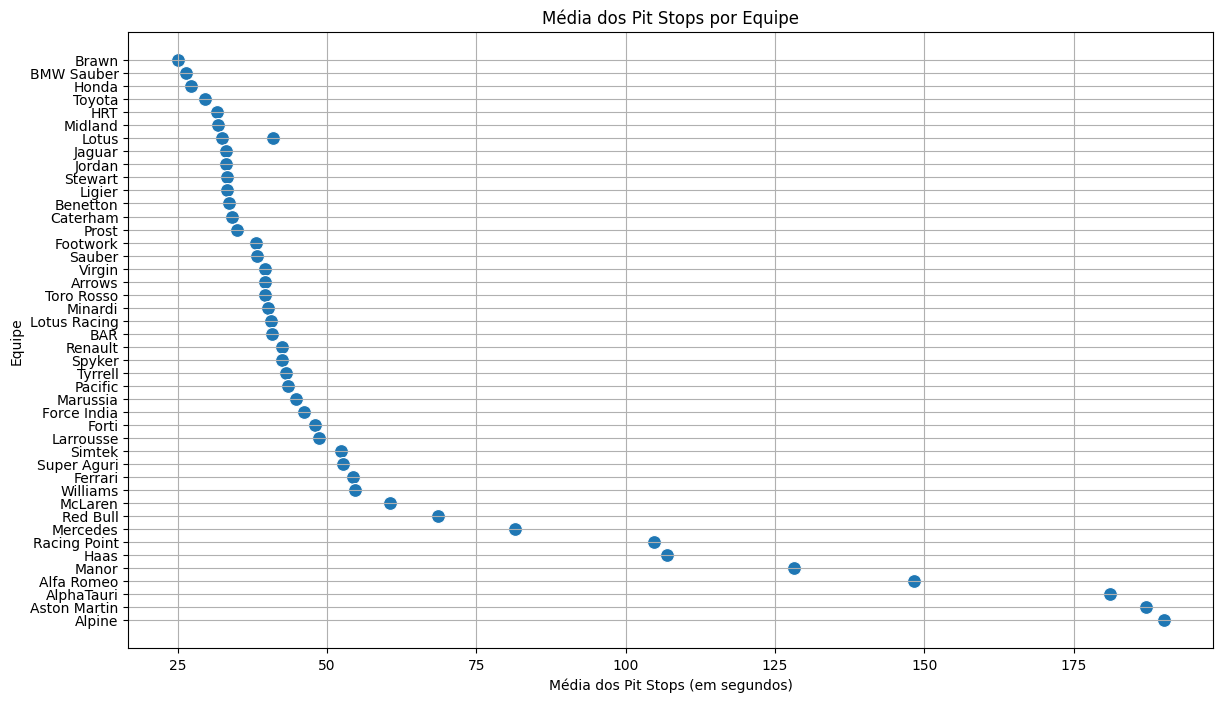

In [ ]:
#Gráfico com a média de tempo de pit-stops por equipe
mean_pit_stops = dfRacesPitStops.groupby('constructorId')['timeMillis'].mean().reset_index()

mean_pit_stops = mean_pit_stops.merge(dfConstructors[['id', 'name']], left_on='constructorId', right_on='id')
mean_pit_stops['seconds'] = mean_pit_stops['timeMillis'] / 1000
mean_pit_stops = mean_pit_stops.sort_values(by='seconds')

plt.figure(figsize=(14, 8))
sns.scatterplot(x='seconds', y='name', data=mean_pit_stops, s=100)
plt.title('Média dos Pit Stops por Equipe')
plt.xlabel('Média dos Pit Stops (em segundos)')
plt.ylabel('Equipe')
plt.grid(True)
plt.show()

Aqui temos a média de tempo dos pit-stops por equipe ao longo de todos os anos de competição. Infelizmente foi notado que esse dado pode ser um pouco desbalanceado em função de alguns valores serem muito altos, de forma que, aparentemente, quando um carro é danificado ou tem que ser retirado da pista, todo esse tempo é atribuido nesse quesito de "pitstop", o que explica equipes presentes nas atuais competições possuírem uma média muito mais do que as do passado.

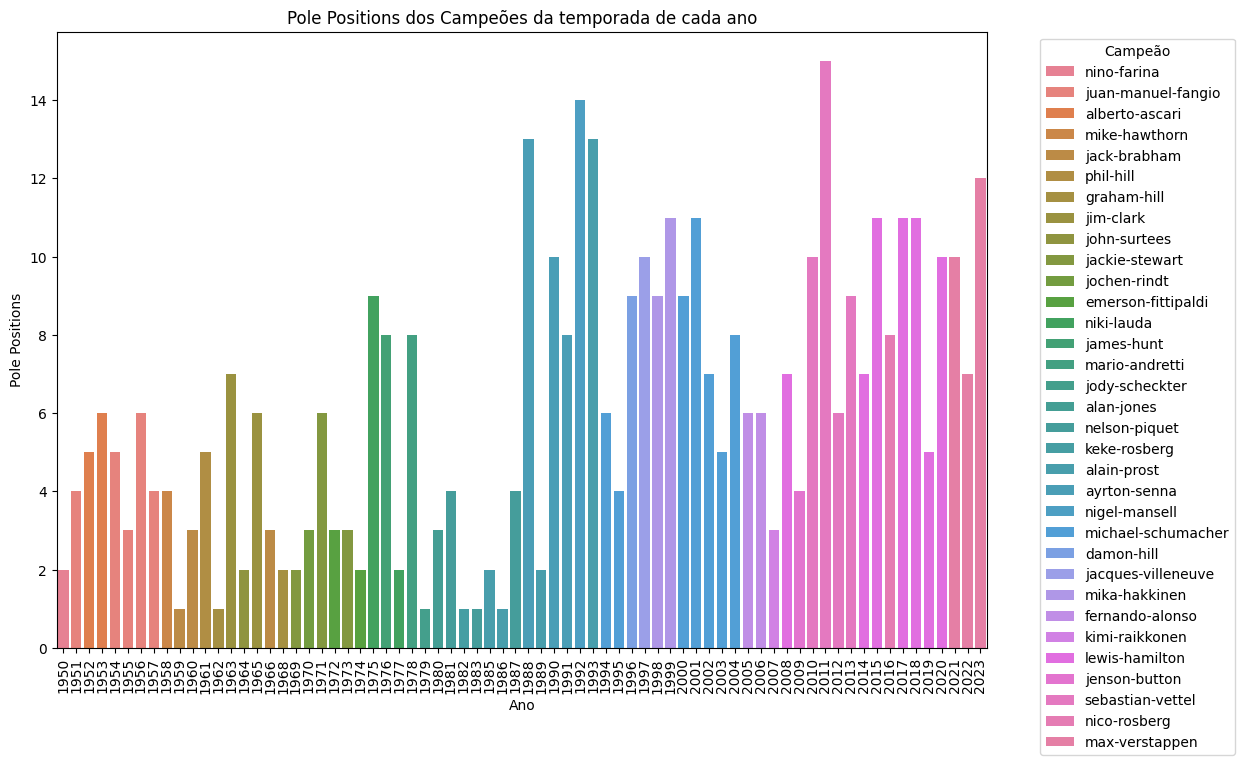

In [ ]:
#histograma da quantidade de PolePositions do campeão da temporada
dfCampeoesPorTemporada = dfSeasonsDriverStandings.query("positionDisplayOrder == 1")
dfPolePositionsPorCorridaPorTemporada = dfRacesStartingGridPositions.query(f"positionDisplayOrder == 1")

dfMerged = pd.merge(
    dfCampeoesPorTemporada[['year', 'driverId']],
    dfPolePositionsPorCorridaPorTemporada[['year', 'driverId']],
    on=['year', 'driverId'],
    how='inner'
)

dfQuantPolePositionDosCampeoesDasTemporadas = dfMerged.groupby(['year', 'driverId']).size().reset_index(name='polePositionsCount')

plt.figure(figsize=(12, 8))
sns.barplot(x='year', y='polePositionsCount', hue='driverId', data=dfQuantPolePositionDosCampeoesDasTemporadas)
plt.title('Pole Positions dos Campeões da temporada de cada ano')
plt.xlabel('Ano')
plt.ylabel('Pole Positions')
plt.legend(title='Campeão', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()


Esse gráfico busca identificar se um campeão obtem muitas Pole Positions (1º lugar no treino = largar em primeiro na corrida) de forma a entender se obter muitas Pole Positions caracteriza um campeão. Com isso, é perceptível que nas competições mais recentes os campeões possuem uma média maior nesse quesito.

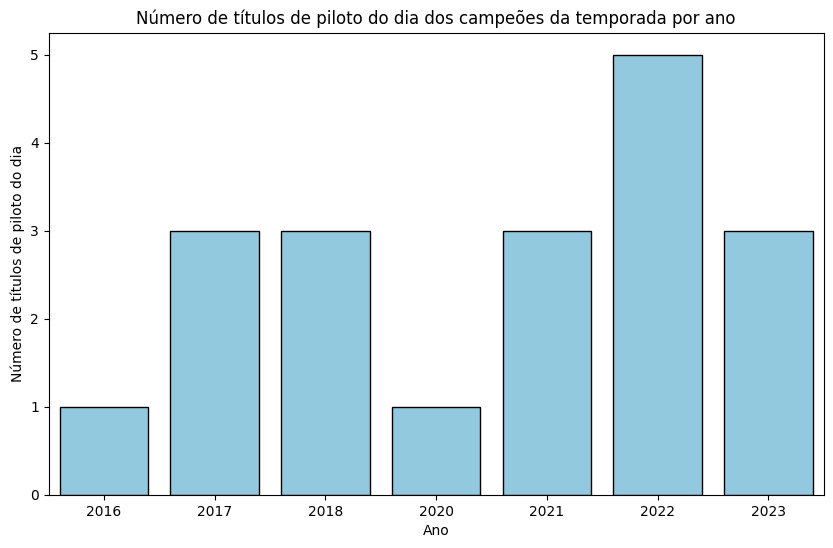

,year,driverId,driverOfTheDayCount
0,2016,nico-rosberg,1
1,2017,lewis-hamilton,3
2,2018,lewis-hamilton,3
3,2020,lewis-hamilton,1
4,2021,max-verstappen,3
5,2022,max-verstappen,5
6,2023,max-verstappen,3


In [ ]:
#Histograma da quantidade de DriverOfTheDay do campeão da temporada

dfCampeoesPorTemporada = dfSeasonsDriverStandings.query("positionDisplayOrder == 1")

dfDriverOfTheDay = dfRacesRaceResults.query("driverOfTheDay == True")

dfMerged = pd.merge(
    dfCampeoesPorTemporada[['year', 'driverId']],
    dfDriverOfTheDay[['year', 'driverId']],
    on=['year', 'driverId'],
    how='inner'
)

dfGrouped = dfMerged.groupby(['year', 'driverId']).size().reset_index(name='driverOfTheDayCount')

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='driverOfTheDayCount', data=dfGrouped, color='skyblue', edgecolor='black')

plt.title('Número de títulos de piloto do dia dos campeões da temporada por ano')
plt.xlabel('Ano')
plt.ylabel('Número de títulos de piloto do dia')
plt.show()
dfGrouped

Aqui, buscamos entender se um campeão consegue muitos prêmios de Driver Of The Day na temporada de sua vitória. Esse prêmio é dado pelo público em votação aberta ao longo de todas as corridas do ano e tendem a ser dadas não só para quem venceu, mas para um piloto destaque, por exemplo, um piloto que está em uma equipe menos badalada e consegue terminar em posição de pontuação (top 10) é bastante valorizado pelo público. Nesse sentido, entende-se porque temos tão poucos prêmios desse tipo para cada campeão.

OBS.: esse prêmio foi criado em 2016 e por isso tem somente dados desses anos

<ipython-input-8-c7cbd9a7ec5e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfIdades['dateOfBirth'] = pd.to_datetime(dfIdades['dateOfBirth'])
<ipython-input-8-c7cbd9a7ec5e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfIdades['idade'] = dfIdades['year'] - dfIdades['dateOfBirth'].dt.year


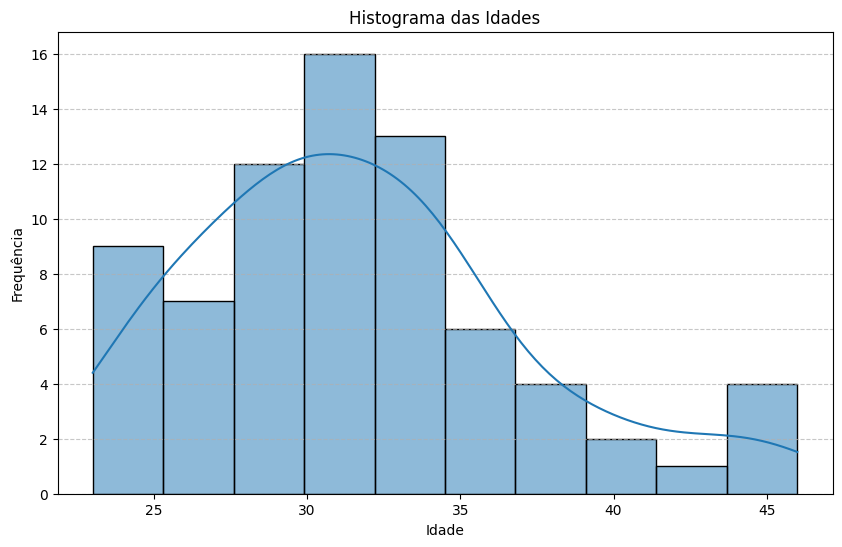

In [ ]:
#histograma das idades dos campeões

dfCampeao = dfDrivers.query("totalChampionshipWins >= 1")
dfAnosCampeoes = dfSeasonsDriverStandings.query("positionDisplayOrder == 1")

dfCampIdades = pd.merge(dfCampeao, dfAnosCampeoes, left_on='id', right_on='driverId')

dfIdades = dfCampIdades[["dateOfBirth", "year"]]

dfIdades['dateOfBirth'] = pd.to_datetime(dfIdades['dateOfBirth'])
dfIdades['idade'] = dfIdades['year'] - dfIdades['dateOfBirth'].dt.year

plt.figure(figsize=(10, 6))
sns.histplot(dfIdades['idade'], bins=10, kde=True)
plt.title('Histograma das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Aqui foi analisado a idade dos campeões nos anos de suas vitórias. Percebe-se que temos o comportamento quase de uma normal que é centrada em 30-32 anos e poucos campeões com 25 anos ou menos, o que nos mostra que experiência certamente é um fator importante aqui, seja realmente pela experiência do esporte, seja pela dificuldade de estrear em equipes mais badaladas do cenário.

Aqui começa nossos testes de Hipótese. Foram testadas 4 hipóteses com relação aos dados explorados acima.

Intervalo de confiança (95%): -0.005353249934243546, 2.5090514948064015
Não rejeitamos a hipótese nula: a média de idade dos campeões é igual à média de idade dos não campeões.
Valor-p: 0.0258


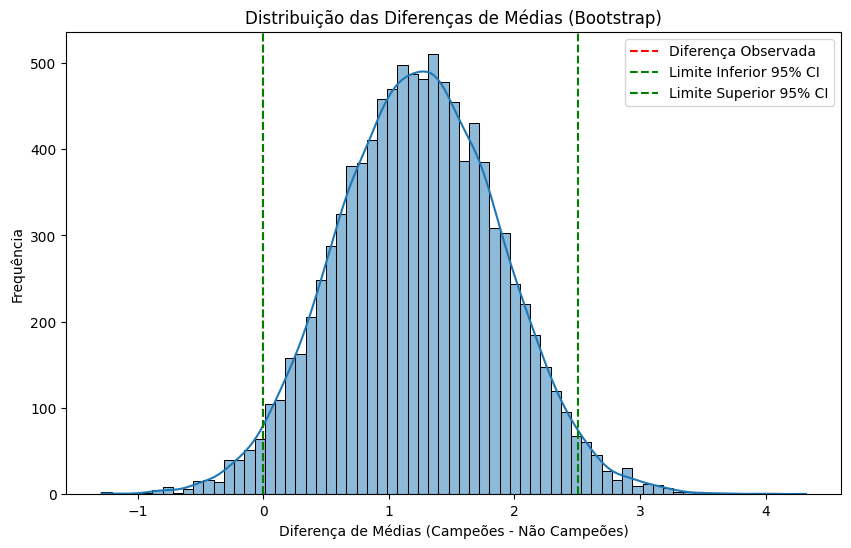

In [ ]:
#Hipótese: a média da idade dos campeões é igual a média da idade dos não campeões
dfIdades = pd.merge(dfDrivers, dfSeasonsDriverStandings, left_on='id', right_on='driverId')
dfIdades = dfIdades[['id', 'name', 'dateOfBirth', 'year', 'positionDisplayOrder']] #campeão se positionDisplayOrder == 1

dfIdades['dateOfBirth'] = pd.to_datetime(dfIdades['dateOfBirth'])
dfIdades['idade'] = dfIdades['year'] - dfIdades['dateOfBirth'].dt.year

dfIdadesCamp = dfIdades.query("positionDisplayOrder == 1")
dfIdadesNCamp = dfIdades.query("positionDisplayOrder != 1")

n_sub = 10000
values = np.zeros(n_sub)

for i in range(n_sub):
    sample = dfIdades.sample(len(dfIdades), replace=True)
    mean_camp = sample.query("positionDisplayOrder == 1")['idade'].mean()
    mean_ncamp = sample.query("positionDisplayOrder != 1")['idade'].mean()
    values[i] = mean_camp - mean_ncamp

# mean_camp_observed = dfIdadesCamp['idade'].mean()
# mean_ncamp_observed = dfIdadesNCamp['idade'].mean()
# observed_diff = mean_camp_observed - mean_ncamp_observed

confidence_interval = np.percentile(values, [2.5, 97.5])
print(f"Intervalo de confiança (95%): {confidence_interval[0]}, {confidence_interval[1]}")

#verificando a hipótese
if confidence_interval[0] <= 0 <= confidence_interval[1]:
    print("Não rejeitamos a hipótese nula: a média de idade dos campeões é igual à média de idade dos não campeões.")
else:
    print("Rejeitamos a hipótese nula: a média de idade dos campeões é diferente da média de idade dos não campeões.")

observed_diff = 0  # Diferença esperada sob a hipótese nula
#observed_diff = dfPilotosProprioPais['positionDisplayOrder'].mean() - dfPilotosForaPais['positionDisplayOrder'].mean()
p_value = np.mean(values < 0)
print(f"Valor-p: {p_value}")

plt.figure(figsize=(10, 6))
sns.histplot(values, kde=True)
plt.axvline(x=0, color='r', linestyle='--', label='Diferença Observada')
plt.axvline(confidence_interval[0], color='g', linestyle='--', label='Limite Inferior 95% CI')
plt.axvline(confidence_interval[1], color='g', linestyle='--', label='Limite Superior 95% CI')
plt.xlabel('Diferença de Médias (Campeões - Não Campeões)')
plt.ylabel('Frequência')
plt.title('Distribuição das Diferenças de Médias (Bootstrap)')
plt.legend()
plt.show()

Aqui, percebe-se que o valor de 0 está bem no limiar do intervalo de confiança, o que pode nos indicar que esse fator potencialmente pode não ser explicado pelo acaso.

Intervalo de confiança (95%): -18.54073136751248, 20.303365035200105
Não rejeitamos a hipótese nula: a média dos pitstops dos campeoes é igual a média dos não campeões por temporada.
Valor-p: 0.5545


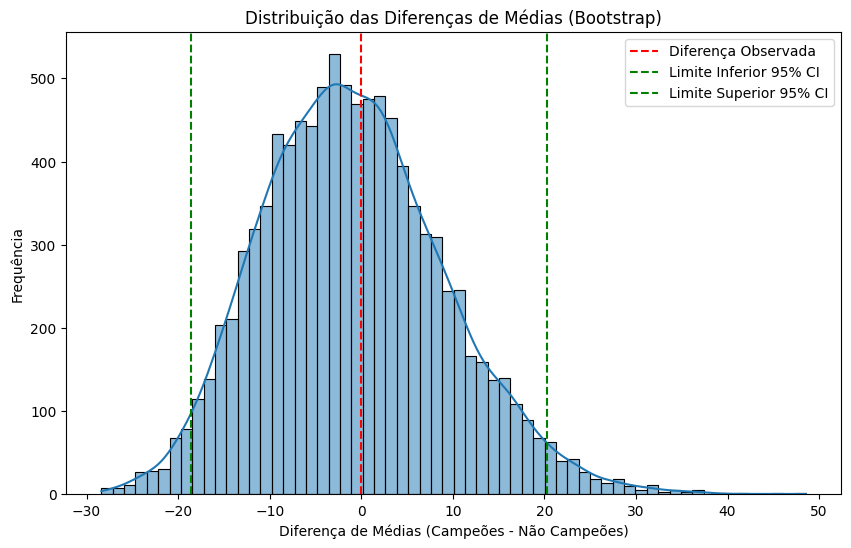

In [ ]:
#Hipotese: a media dos pitstops dos campeoes é igual a média dos não campeões por temporada

meanPitStops = dfRacesPitStops.groupby(['driverId', 'year'])['timeMillis'].mean().reset_index()
dfPilotosPorTemporada = dfSeasonsDriverStandings

dfTempo = pd.merge(
    dfPilotosPorTemporada[['year', 'driverId', 'positionDisplayOrder']],
    meanPitStops[['year', 'driverId', 'timeMillis']],
    on=['year', 'driverId'],
    how='inner'
)

dfTempo['seconds'] = dfTempo['timeMillis'] / 1000

n_sub = 10000
values = np.zeros(n_sub)

for i in range(n_sub):
    sample = dfTempo.sample(len(dfTempo), replace=True)
    mean_camp = sample.query("positionDisplayOrder == 1")['seconds'].mean()
    mean_ncamp = sample.query("positionDisplayOrder != 1")['seconds'].mean()
    values[i] = mean_camp - mean_ncamp

# mean_camp_observed = dfTempo.query("positionDisplayOrder == 1")['seconds'].mean()
# mean_ncamp_observed = dfTempo.query("positionDisplayOrder != 1")['seconds'].mean()
# observed_diff = mean_camp_observed - mean_ncamp_observed

confidence_interval = np.percentile(values, [2.5, 97.5])
#print(f"Diferença observada: {observed_diff}")
print(f"Intervalo de confiança (95%): {confidence_interval[0]}, {confidence_interval[1]}")

#verificando a hipótese
if confidence_interval[0] <= 0 <= confidence_interval[1]:
    print("Não rejeitamos a hipótese nula: a média dos pitstops dos campeoes é igual a média dos não campeões por temporada.")
else:
    print("Rejeitamos a hipótese nula: a média dos pitstops dos campeoes é diferente a média dos não campeões por temporada.")

observed_diff = 0  # Diferença esperada sob a hipótese nula
p_value = np.mean(values <= 0)
print(f"Valor-p: {p_value}")

plt.figure(figsize=(10, 6))
sns.histplot(values, kde=True)
plt.axvline(x=0, color='r', linestyle='--', label='Diferença Observada')
plt.axvline(confidence_interval[0], color='g', linestyle='--', label='Limite Inferior 95% CI')
plt.axvline(confidence_interval[1], color='g', linestyle='--', label='Limite Superior 95% CI')
plt.xlabel('Diferença de Médias (Campeões - Não Campeões)')
plt.ylabel('Frequência')
plt.title('Distribuição das Diferenças de Médias (Bootstrap)')
plt.legend()
plt.show()

Aqui claramente temos que a diferença de média de pitstops dos campeões e não campeões pode ser explicada pelo acaso

Intervalo de confiança (95%): 1.7387279365545545, 2.4562112333307686
Rejeitamos a hipótese nula: a média da classificação dos pilotos quando correm em 'casa' é diferente à média da classificação dos pilotos quando correm fora 'casa'.
Valor-p: 0.0


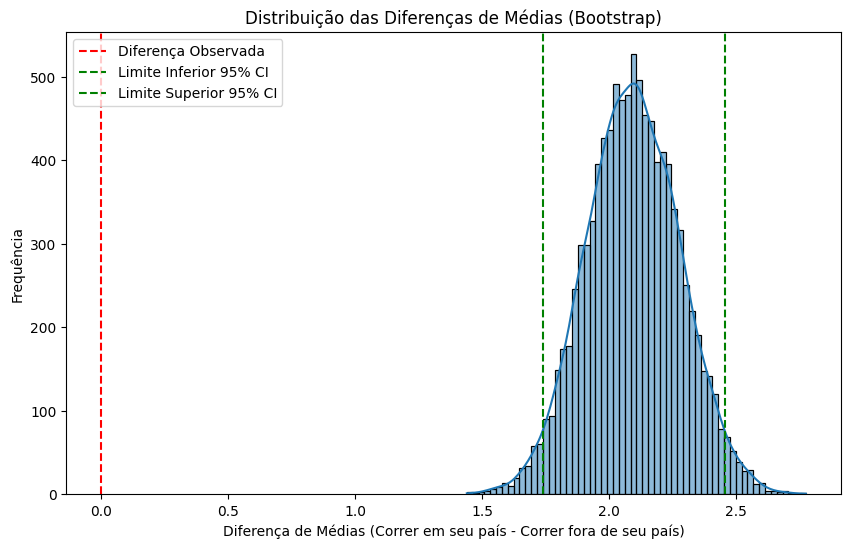

In [ ]:
#hipótese: pilotos que correm no seu país de nascimento/país de nacionalidade tendem a ir bem na corrida (top 5)
dfRenameCircuitos = dfCircuits.rename(columns={'name': 'circuitName'})
dfRenameCountries = dfCountries.rename(columns={'name': 'countryName'})
dfPaisesCircuitos = pd.merge(dfRenameCircuitos, dfRenameCountries, left_on='countryId', right_on='id')
dfPaisesCircuitos = dfPaisesCircuitos.rename(columns={'id_x': 'idCircuit', 'id_y':'idCountry'})
dfPaisesCircuitos = dfPaisesCircuitos[['idCircuit', 'idCountry', 'circuitName', 'countryName']]

df = pd.merge(dfPaisesCircuitos, dfRaces, left_on='idCircuit', right_on='circuitId')
dfCorridas = df[['idCircuit', 'idCountry', 'circuitName', 'countryName', 'id', 'year', 'grandPrixId']]
dfCorridas = dfCorridas.rename(columns={'id': 'idRace'})

dfCorridasPais = pd.merge(dfCorridas, dfRacesRaceResults, left_on='idRace', right_on='raceId')
dfCorridasPais = dfCorridasPais[['idCircuit', 'idCountry', 'circuitName', 'countryName', 'idRace', 'year_x', 'grandPrixId', 'round', 'positionDisplayOrder' , 'driverId']]
dfCorridasPais = dfCorridasPais.rename(columns={'year_x':'year'})

dfPilotoPais = pd.merge(dfCorridasPais, dfDrivers, left_on='driverId', right_on='id')
dfPilotoPais = dfPilotoPais[['idCircuit', 'idCountry', 'circuitName', 'countryName', 'idRace', 'year', 'grandPrixId', 'round', 'positionDisplayOrder' , 'driverId', 'name', 'placeOfBirth', 'countryOfBirthCountryId', 'nationalityCountryId']]
dfPilotoPais = dfPilotoPais.sort_values(by=['year', 'round', 'positionDisplayOrder'])


dfPilotosProprioPais = dfPilotoPais.query("idCountry == countryOfBirthCountryId or idCountry == nationalityCountryId")
dfPilotosForaPais = dfPilotoPais.query("idCountry != countryOfBirthCountryId and idCountry != nationalityCountryId")

n_sub = 10000
values = np.zeros(n_sub)

for i in range(n_sub):
    sampleCasa = dfPilotosProprioPais.sample(len(dfPilotosProprioPais), replace=True)
    sampleFora = dfPilotosForaPais.sample(len(dfPilotosForaPais), replace=True)

    mean_casa = sampleCasa['positionDisplayOrder'].mean()
    mean_fora = sampleFora['positionDisplayOrder'].mean()
    values[i] = mean_casa - mean_fora

confidence_interval = np.percentile(values, [2.5, 97.5])
#print(f"Diferença observada: {observed_diff}")
print(f"Intervalo de confiança (95%): {confidence_interval[0]}, {confidence_interval[1]}")

#verificando a hipótese
if confidence_interval[0] <= 0 <= confidence_interval[1]:
    print("Não rejeitamos a hipótese nula: a média da classificação dos pilotos quando correm em 'casa' é igual à média da classificação dos pilotos quando correm fora 'casa'.")
else:
    print("Rejeitamos a hipótese nula: a média da classificação dos pilotos quando correm em 'casa' é diferente à média da classificação dos pilotos quando correm fora 'casa'.")

#observed_diff = 0  # Diferença esperada sob a hipótese nula
p_value = np.mean(values < 0)
print(f"Valor-p: {p_value}")

plt.figure(figsize=(10, 6))
sns.histplot(values, kde=True)
plt.axvline(x=0, color='r', linestyle='--', label='Diferença Observada')
plt.axvline(confidence_interval[0], color='g', linestyle='--', label='Limite Inferior 95% CI')
plt.axvline(confidence_interval[1], color='g', linestyle='--', label='Limite Superior 95% CI')
plt.xlabel('Diferença de Médias (Correr em seu país - Correr fora de seu país)')
plt.ylabel('Frequência')
plt.title('Distribuição das Diferenças de Médias (Bootstrap)')
plt.legend()
plt.show()

Aqui temos claramente uma situação de correlação pois percebe-se a grande distância da diferença observada para o intervalo de confiança computado, logo a média da classificação dos pilotos quando correm em 'casa' é diferente à média da classificação dos pilotos quando correm fora 'casa'

Intervalo de confiança (95%): -8.602609772367062, -7.744741312903091
Rejeitamos a hipótese nula: a média da colocação no Treino dos campeões não é igual a média da colocação no Treino dos outros pilotos na temporada
Valor-p: 1.0


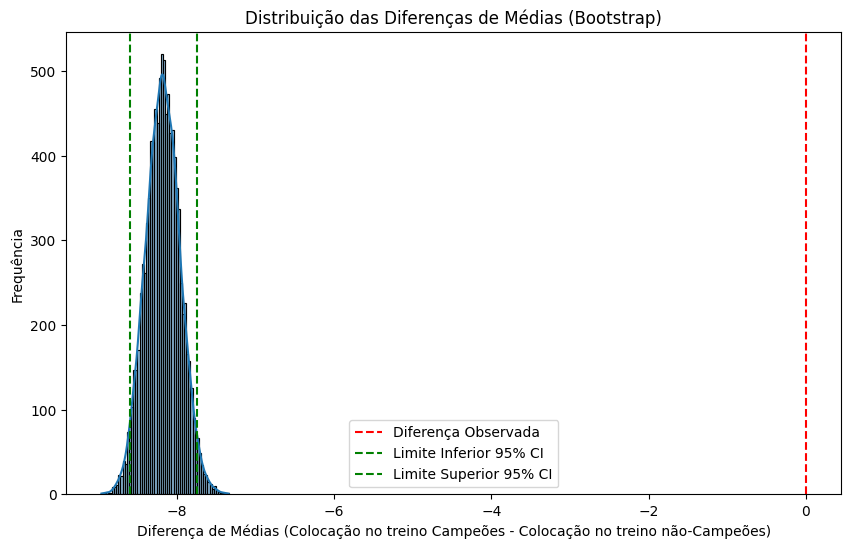

In [ ]:
#Hipótese: a média da colocação no Treino dos campeões é igual a média da colocação no Treino dos outros pilotos na temporada
dfPosicoes = pd.merge(dfDrivers, dfSeasonsDriverStandings, left_on='id', right_on='driverId')
dfPosicoes = dfPosicoes[['id', 'name', 'dateOfBirth', 'year', 'positionDisplayOrder']] #campeão se positionDisplayOrder == 1
dfPosicoes = dfPosicoes.rename(columns={'positionDisplayOrder': 'classFinal'})

dfPosicaoPilotoTreino = pd.merge(dfPosicoes, dfRacesQualifyingResults, left_on=['id', 'year'], right_on=['driverId', 'year'])
dfPosicaoPilotoTreino = dfPosicaoPilotoTreino[['id', 'name', 'year', 'classFinal', 'round', 'positionDisplayOrder']]

dfPosicaoPilotoTreino = dfPosicaoPilotoTreino.groupby(['id', 'year'])[['positionDisplayOrder', 'classFinal']].mean().reset_index()

dfCamp = dfPosicaoPilotoTreino.query("classFinal == 1")
dfNCamp = dfPosicaoPilotoTreino.query("classFinal != 1")

n_sub = 10000
values = np.zeros(n_sub)

for i in range(n_sub):
    sampleCamp = dfCamp.sample(len(dfCamp), replace=True)
    sampleNCamp = dfNCamp.sample(len(dfNCamp), replace=True)

    meanCamp = sampleCamp['positionDisplayOrder'].mean()
    meanNCamp = sampleNCamp['positionDisplayOrder'].mean()
    values[i] = meanCamp - meanNCamp

confidence_interval = np.percentile(values, [2.5, 97.5])
print(f"Intervalo de confiança (95%): {confidence_interval[0]}, {confidence_interval[1]}")

#verificando a hipótese
if confidence_interval[0] <= 0 <= confidence_interval[1]:
    print("Não rejeitamos a hipótese nula: a média da colocação no Treino dos campeões é igual a média da colocação no Treino dos outros pilotos na temporada")
else:
    print("Rejeitamos a hipótese nula: a média da colocação no Treino dos campeões não é igual a média da colocação no Treino dos outros pilotos na temporada")

observed_diff = 0  # Diferença esperada sob a hipótese nula
#observed_diff = dfCamp['positionDisplayOrder'].mean() - dfNCamp['positionDisplayOrder'].mean()
p_value = np.mean(abs(values) > observed_diff)
print(f"Valor-p: {p_value}")

plt.figure(figsize=(10, 6))
sns.histplot(values, kde=True)
plt.axvline(x=0, color='r', linestyle='--', label='Diferença Observada')
plt.axvline(confidence_interval[0], color='g', linestyle='--', label='Limite Inferior 95% CI')
plt.axvline(confidence_interval[1], color='g', linestyle='--', label='Limite Superior 95% CI')
plt.xlabel('Diferença de Médias (Colocação no treino Campeões - Colocação no treino não-Campeões)')
plt.ylabel('Frequência')
plt.title('Distribuição das Diferenças de Médias (Bootstrap)')
plt.legend()
plt.show()


Aqui percebe-se que deveríamos rejeitar a nula, pórem como foi obtido um valor negativo, indicando que não campeões tem média melhor de colocação foi analisado que talvez isso se explique por fatores externos, como, no caso de um campeão, se esse quebrar o carro durante o treino, sua colocação será a última, o que acaba jogando a sua média para baixo sem nenhum outro piloto pontuando para compensar.

**AQUI começa nossas análises em busca do modelo que explica atributos dos campeões**

Primeiramente está sendo feita uma regressão linear que tanto associar a colocação no campeonato com o tempo médio de pit stops de um piloto

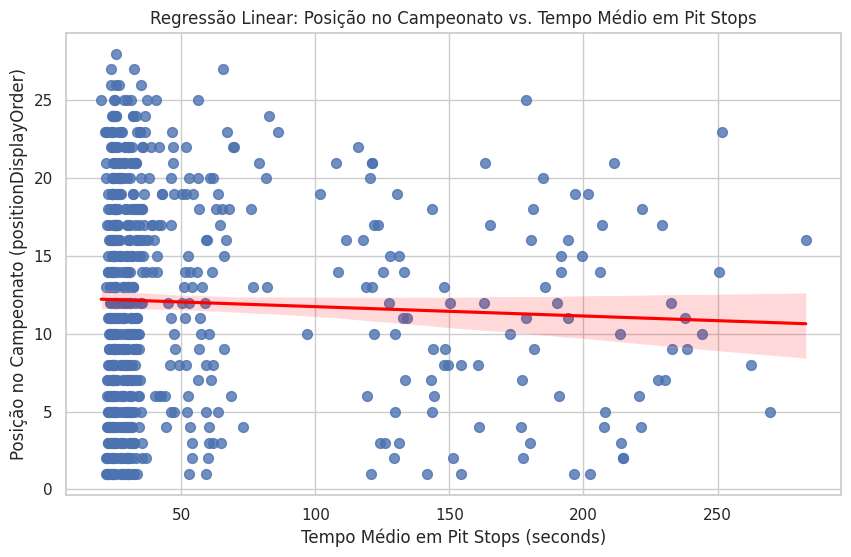

In [ ]:
meanPitStops = dfRacesPitStops.groupby(['driverId', 'year'])['timeMillis'].mean().reset_index()
dfPilotosPorTemporada = dfSeasonsDriverStandings

dfTempo = pd.merge(
    dfPilotosPorTemporada[['year', 'driverId', 'positionDisplayOrder']],
    meanPitStops[['year', 'driverId', 'timeMillis']],
    on=['year', 'driverId'],
    how='inner'
)

dfTempo['seconds'] = dfTempo['timeMillis'] / 1000

dfTempoReg = dfTempo.copy()
dfTempoReg['positionDisplayOrder'] = pd.to_numeric(dfTempoReg['positionDisplayOrder'])
dfTempoReg['seconds'] = pd.to_numeric(dfTempoReg['seconds'])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.regplot(x='seconds', y='positionDisplayOrder', data=dfTempoReg, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Regressão Linear: Posição no Campeonato vs. Tempo Médio em Pit Stops')
plt.xlabel('Tempo Médio em Pit Stops (seconds)')
plt.ylabel('Posição no Campeonato (positionDisplayOrder)')

plt.show()

In [ ]:
dfTempoReg['positionDisplayOrder'] = pd.to_numeric(dfTempoReg['positionDisplayOrder'])
dfTempoReg['seconds'] = pd.to_numeric(dfTempoReg['seconds'])

X = dfTempoReg['seconds']
y = dfTempoReg['positionDisplayOrder']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Calculando o R²
r_squared = model.rsquared
print(f"Coeficiente de Determinação R²: {r_squared:.4f}")

Coeficiente de Determinação R²: 0.0021


Percebe-se que a regressão linear não foi muito boa nesse caso pela distribuição dos tempos de pit stops, que pelos motivos já citados anteriormente, são um pouco mal calculados. Pode ser notado também o quão baixo é o valor do R2 para esse cálculo.

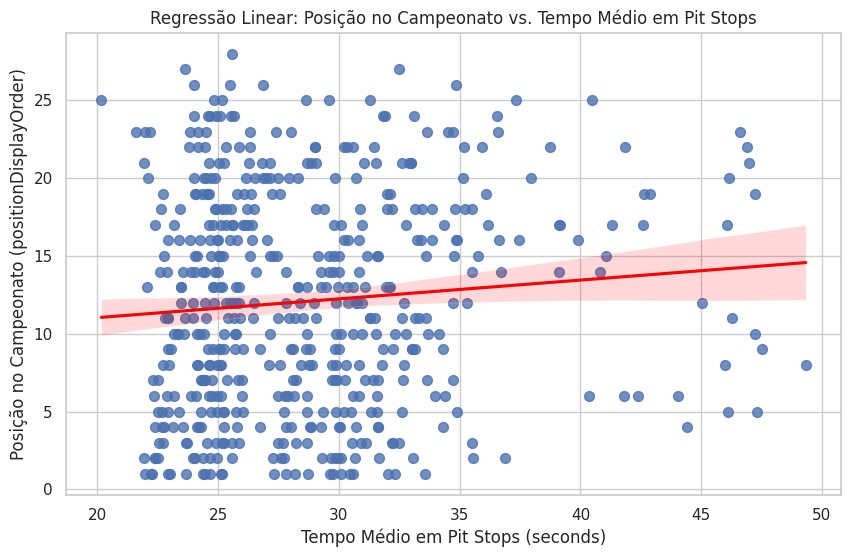

In [ ]:
dfTempoReg = dfTempo.copy()
dfTempoReg['positionDisplayOrder'] = pd.to_numeric(dfTempoReg['positionDisplayOrder'])
dfTempoReg['seconds'] = pd.to_numeric(dfTempoReg.query('seconds < 50')['seconds'])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.regplot(x='seconds', y='positionDisplayOrder', data=dfTempoReg, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Regressão Linear: Posição no Campeonato vs. Tempo Médio em Pit Stops')
plt.xlabel('Tempo Médio em Pit Stops (seconds)')
plt.ylabel('Posição no Campeonato (positionDisplayOrder)')

plt.show()

In [ ]:
dfTempoReg = dfTempoReg.replace([np.inf, -np.inf], np.nan).dropna(subset=['seconds', 'positionDisplayOrder'])

X = dfTempoReg['seconds']
y = dfTempoReg['positionDisplayOrder']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Calculando o R²
r_squared = model.rsquared
print(f"Coeficiente de Determinação R²: {r_squared:.4f}")

Coeficiente de Determinação R²: 0.0088


Já aqui, filtrando pelos tempos mais tangíveis (menos de 50 segundos) temos uma regressão um pouco mais realista, mas que ainda não se apresenta como uma boa regressão, visto que o valor de R2 ainda é muito baixo.

Agora será feita uma regressão logística para os mesmos atributos

Optimization terminated successfully.
         Current function value: 0.685781
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                  680
Model:                          Logit   Df Residuals:                      678
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Aug 2024   Pseudo R-squ.:               0.0006266
Time:                        22:10:36   Log-Likelihood:                -466.33
converged:                       True   LL-Null:                       -466.62
Covariance Type:            nonrobust   LLR p-value:                    0.4444
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2955      0.109     -2.703      0.007      -0.510      -0.081
seconds        0.0011      0.

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


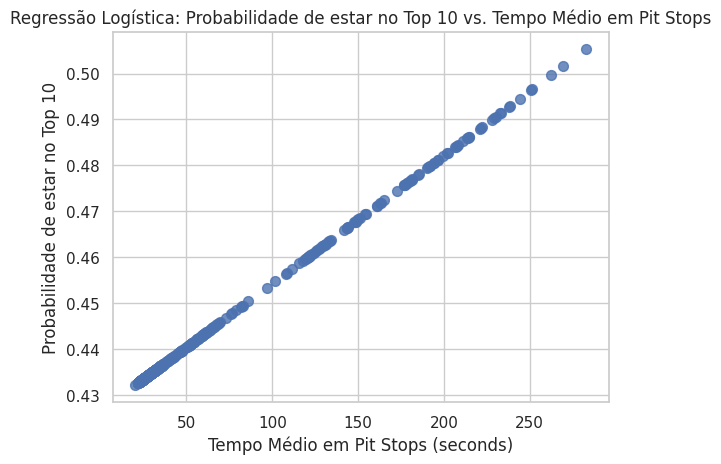

In [ ]:
dfTempoReg['positionDisplayOrder'] = pd.to_numeric(dfTempoReg['positionDisplayOrder'])
dfTempoReg['seconds'] = pd.to_numeric(dfTempoReg['seconds'])

dfTempoReg['top10'] = (dfTempoReg['positionDisplayOrder'] <= 10).astype(int)

X = dfTempoReg['seconds']
y = dfTempoReg['top10']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())
dfTempoReg['predicted'] = logit_model.predict(X)

sns.regplot(x='seconds', y='predicted', data=dfTempoReg, logistic=True, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Regressão Logística: Probabilidade de estar no Top 10 vs. Tempo Médio em Pit Stops')
plt.xlabel('Tempo Médio em Pit Stops (seconds)')
plt.ylabel('Probabilidade de estar no Top 10')

plt.show()

Percebe-se novamente que não foi obtida uma regressão interessante em termos de análise dos dados, pórem, a dificuldade ainda se encontra na questão dos dados de tempo de pit-stop

Optimization terminated successfully.
         Current function value: 0.684006
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                  513
Model:                          Logit   Df Residuals:                      511
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                0.003661
Time:                        19:12:20   Log-Likelihood:                -350.89
converged:                       True   LL-Null:                       -352.18
Covariance Type:            nonrobust   LLR p-value:                    0.1083
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5399      0.492      1.097      0.272      -0.424       1.504
seconds       -0.0268      0.

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


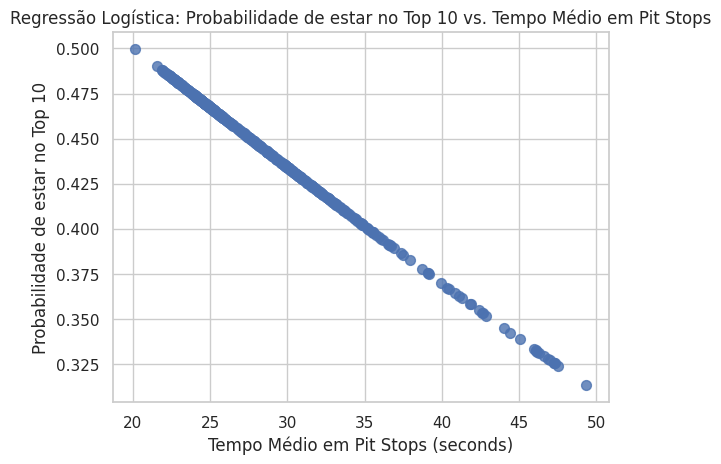

In [ ]:
meanPitStops = dfRacesPitStops.groupby(['driverId', 'year'])['timeMillis'].mean().reset_index()
dfPilotosPorTemporada = dfSeasonsDriverStandings

dfTempo = pd.merge(
    dfPilotosPorTemporada[['year', 'driverId', 'positionDisplayOrder']],
    meanPitStops[['year', 'driverId', 'timeMillis']],
    on=['year', 'driverId'],
    how='inner'
)

dfTempo['seconds'] = dfTempo['timeMillis'] / 1000

dfTempoReg = dfTempo.copy()

# Convertendo as colunas para o tipo numérico se ainda não estiverem
dfTempoReg['positionDisplayOrder'] = pd.to_numeric(dfTempoReg['positionDisplayOrder'])
dfTempoReg['seconds'] = pd.to_numeric(dfTempoReg.query('seconds < 50')['seconds'])
dfTempoReg = dfTempoReg.replace([np.inf, -np.inf], np.nan).dropna(subset=['seconds', 'positionDisplayOrder'])

dfTempoReg['top10'] = (dfTempoReg['positionDisplayOrder'] <= 10).astype(int)

X = dfTempoReg['seconds']
y = dfTempoReg['top10']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

dfTempoReg['predicted'] = logit_model.predict(X)

sns.regplot(x='seconds', y='predicted', data=dfTempoReg, logistic=True, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Regressão Logística: Probabilidade de estar no Top 10 vs. Tempo Médio em Pit Stops')
plt.xlabel('Tempo Médio em Pit Stops (seconds)')
plt.ylabel('Probabilidade de estar no Top 10')

plt.show()

Agora, é possível ter uma relação um pouco melhor e mais realista entre os atributos ao filtrar o tempo de pit-stop novamente antes de aplicar a regressão para se ter somente valores mais tangíveis.

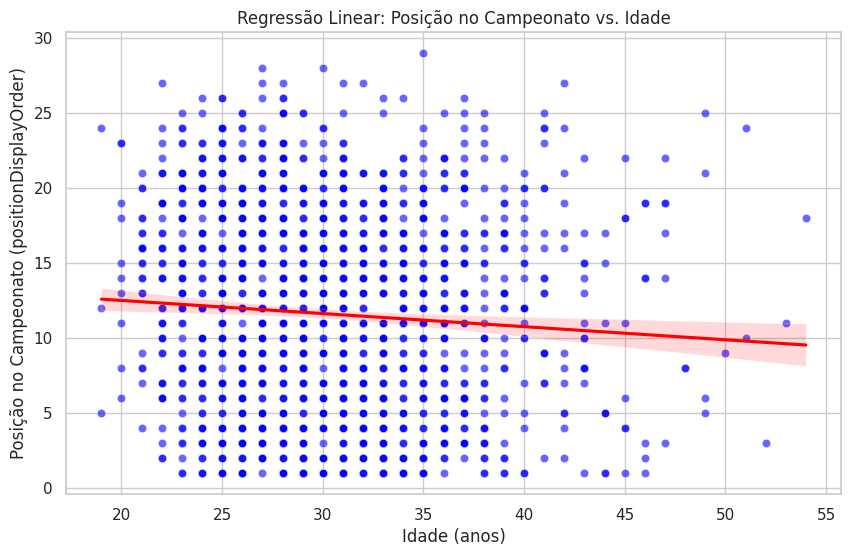

In [ ]:
dfIdades = pd.merge(dfDrivers, dfSeasonsDriverStandings, left_on='id', right_on='driverId')
dfIdades = dfIdades[['id', 'name', 'dateOfBirth', 'year', 'positionDisplayOrder']] #campeão se positionDisplayOrder == 1

dfIdades['dateOfBirth'] = pd.to_datetime(dfIdades['dateOfBirth'])
dfIdades['idade'] = dfIdades['year'] - dfIdades['dateOfBirth'].dt.year

dfIdades['positionDisplayOrder'] = pd.to_numeric(dfIdades.query('idade > 18')['positionDisplayOrder'], errors='coerce')
dfIdades['idade'] = pd.to_numeric(dfIdades.query('idade > 18')['idade'], errors='coerce')

dfIdades = dfIdades.dropna(subset=['positionDisplayOrder', 'idade'])

X = dfIdades['idade']
y = dfIdades['positionDisplayOrder']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=dfIdades['idade'], y=dfIdades['positionDisplayOrder'], color='blue', alpha=0.6)
sns.regplot(x=dfIdades['idade'], y=dfIdades['positionDisplayOrder'], color='red', scatter=False)
plt.title('Regressão Linear: Posição no Campeonato vs. Idade')
plt.xlabel('Idade (anos)')
plt.ylabel('Posição no Campeonato (positionDisplayOrder)')
plt.show()

In [ ]:
X = dfIdades['idade']
y = dfIdades['positionDisplayOrder']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Calculando o R²
r_squared = model.rsquared
print(f"Coeficiente de Determinação R²: {r_squared:.4f}")

Coeficiente de Determinação R²: 0.0055


Mais uma vez não foi encontrada uma regressão linear boa, dessa vez na tentativa de relacionar os dados de idade e posição no campeonato

Optimization terminated successfully.
         Current function value: 0.687691
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 1525
Model:                          Logit   Df Residuals:                     1523
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                0.003034
Time:                        19:31:34   Log-Likelihood:                -1048.7
converged:                       True   LL-Null:                       -1051.9
Covariance Type:            nonrobust   LLR p-value:                   0.01152
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9897      0.332     -2.984      0.003      -1.640      -0.340
idade          0.0278      0.

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


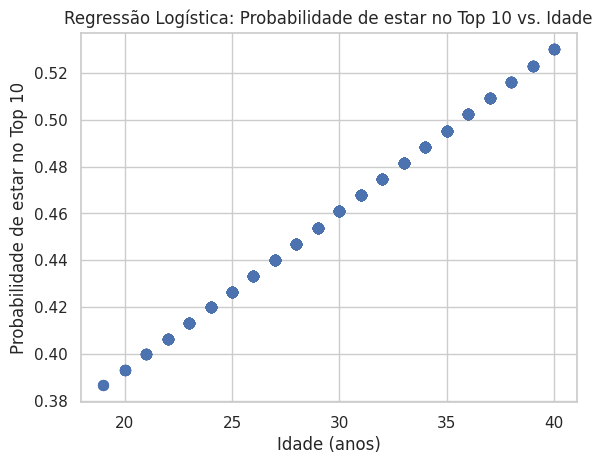

In [ ]:
dfIdades['positionDisplayOrder'] = pd.to_numeric(dfIdades.query('idade > 18')['positionDisplayOrder'], errors='coerce')
dfIdades['idade'] = pd.to_numeric(dfIdades.query('idade > 18')['idade'], errors='coerce')

dfIdades['top10'] = (dfIdades['positionDisplayOrder'] <= 10).astype(int)

dfIdades = dfIdades.dropna(subset=['top10', 'idade'])

X = dfIdades['idade']
y = dfIdades['top10']

X = sm.add_constant(X)
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

dfIdades['predicted_prob'] = logit_model.predict(X)

sns.regplot(x=dfIdades['idade'], y=dfIdades['predicted_prob'], data=dfIdades, logistic=True, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Regressão Logística: Probabilidade de estar no Top 10 vs. Idade')
plt.xlabel('Idade (anos)')
plt.ylabel('Probabilidade de estar no Top 10')

plt.show()

Aqui a regressão logistíca obteve uma relacão mais clara entre idade e probabilidade de estar no top-10, mas provavelmente esses dados estão enviesados no sentido de população, visto que existem menos pilotos com idade mais avançada, o que faz com que, caso um ou poucos pilotos dessa faixa etária alcançem o top10, a média desse grupo aumenta drasticamente.

Agora, será feito um modelo de regressão logística utilizando o treinamento e previsão do SKlearn para associar a probabilidade de top-10 com a nacionalidade do piloto

Accuracy: 0.5739967084441069
              precision    recall  f1-score   support

           0       0.58      0.90      0.71      4526
           1       0.50      0.14      0.22      3373

    accuracy                           0.57      7899
   macro avg       0.54      0.52      0.46      7899
weighted avg       0.55      0.57      0.50      7899



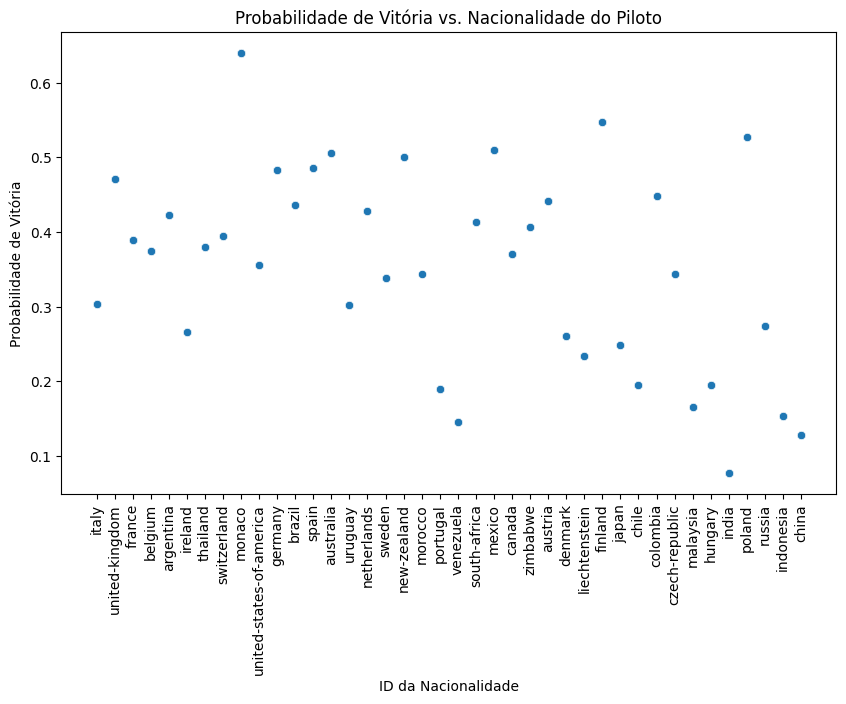

In [ ]:
dfPilotoPais['win'] = np.where(dfPilotoPais['positionDisplayOrder'] <= 10, 1, 0)

X = dfPilotoPais[['nationalityCountryId']]
X = pd.get_dummies(X, drop_first=True)
y = dfPilotoPais['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

dfPilotoPais['win_prob'] = model.predict_proba(X)[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='nationalityCountryId', y='win_prob', data=dfPilotoPais)
plt.title('Probabilidade de Vitória vs. Nacionalidade do Piloto')
plt.xlabel('ID da Nacionalidade')
plt.ylabel('Probabilidade de Vitória')
plt.xticks(rotation=90)
plt.show()

Esse modelo já teve um resultado qualitativo bem melhor que os anteriores com valores razoáveis de precisão e revocação, aqui os valores ainda podem estar enviesados por população, por exemplo, mônaco ser o país com maior probabilidade de vitória é ter poucos no total sendo que um desses pilotos (Charles Leclerc) tem boas atuações sempre e aumenta facilmente a média de colocação do grupo.

Agora, para verificar a variação entre os países será aplicado o mesmo modelo mas para a variável de país de nascimento.

Accuracy: 0.5750094948727688
              precision    recall  f1-score   support

           0       0.58      0.89      0.71      4526
           1       0.51      0.15      0.23      3373

    accuracy                           0.58      7899
   macro avg       0.55      0.52      0.47      7899
weighted avg       0.55      0.58      0.50      7899



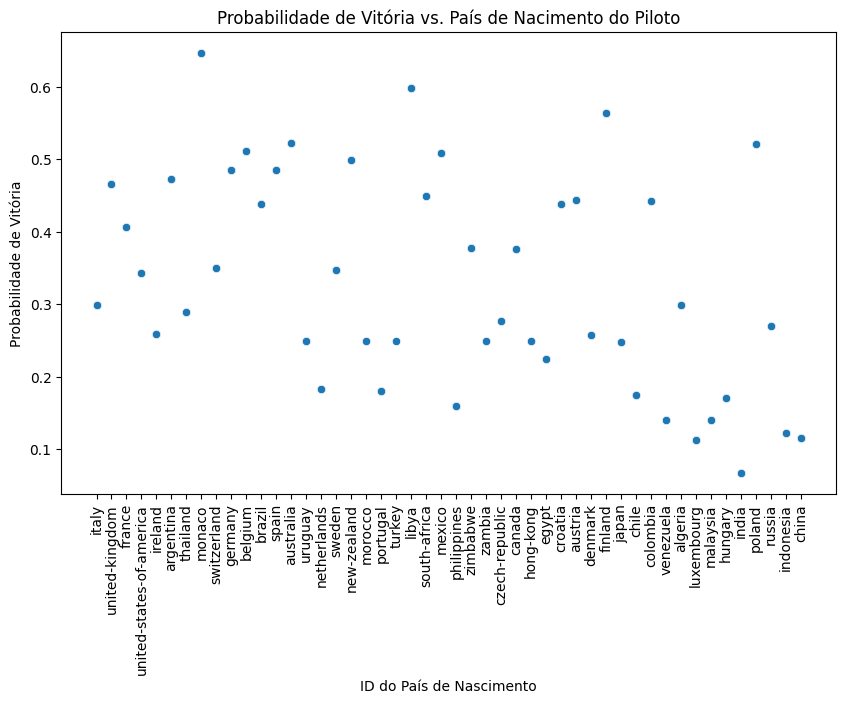

In [ ]:
dfPilotoPais['win'] = np.where(dfPilotoPais['positionDisplayOrder'] <= 10, 1, 0)

X = dfPilotoPais[['countryOfBirthCountryId']]
X = pd.get_dummies(X, drop_first=True)
y = dfPilotoPais['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

dfPilotoPais['win_prob'] = model.predict_proba(X)[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='countryOfBirthCountryId', y='win_prob', data=dfPilotoPais)
plt.title('Probabilidade de Vitória vs. País de Nacimento do Piloto')
plt.xlabel('ID do País de Nascimento')
plt.ylabel('Probabilidade de Vitória')
plt.xticks(rotation=90)
plt.show()

Aqui há a aparição de novos países pelo dado ser com relação ao país de nascimento e serve como comparativo em termos de países com o modelo anterior, visto que a matriz de confusão de ambos são parecidas.

In [ ]:
dfRenameCircuitos = dfCircuits.rename(columns={'name': 'circuitName'})
dfRenameCountries = dfCountries.rename(columns={'name': 'countryName'})
dfPaisesCircuitos = pd.merge(dfRenameCircuitos, dfRenameCountries, left_on='countryId', right_on='id')
dfPaisesCircuitos = dfPaisesCircuitos.rename(columns={'id_x': 'idCircuit', 'id_y':'idCountry'})
dfPaisesCircuitos = dfPaisesCircuitos[['idCircuit', 'idCountry', 'circuitName', 'countryName']]

df = pd.merge(dfPaisesCircuitos, dfRaces, left_on='idCircuit', right_on='circuitId')
dfCorridas = df[['idCircuit', 'idCountry', 'circuitName', 'countryName', 'id', 'year', 'grandPrixId']]
dfCorridas = dfCorridas.rename(columns={'id': 'idRace'})

dfCorridasPais = pd.merge(dfCorridas, dfRacesRaceResults, left_on='idRace', right_on='raceId')

dfPilotoPais = pd.merge(dfCorridasPais, dfDrivers, left_on='driverId', right_on='id')

dfPilotoPais = dfPilotoPais[['idCircuit', 'circuitName', 'idRace', 'year_x', 'grandPrixId', 'round', 'positionDisplayOrder', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId', 'countryOfBirthCountryId', 'nationalityCountryId']]

Aplicando regressão logística para associar analisar a probabilidade de vitória em uma corrida por equipe, aqui foi feito um filtro para pegar somente corridas de 1980 para frente a fim de evitar equipes já inexistentes (apesar de ainda possuir algumas dessas no intervalo de anos filtrado)

<ipython-input-6-0dd6cfc0f3ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPilotoPais['win'] = np.where(dfPilotoPais['positionDisplayOrder'] <= 1, 1, 0)


Accuracy: 0.9544191217342969
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5151
           1       0.00      0.00      0.00       246

    accuracy                           0.95      5397
   macro avg       0.48      0.50      0.49      5397
weighted avg       0.91      0.95      0.93      5397



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


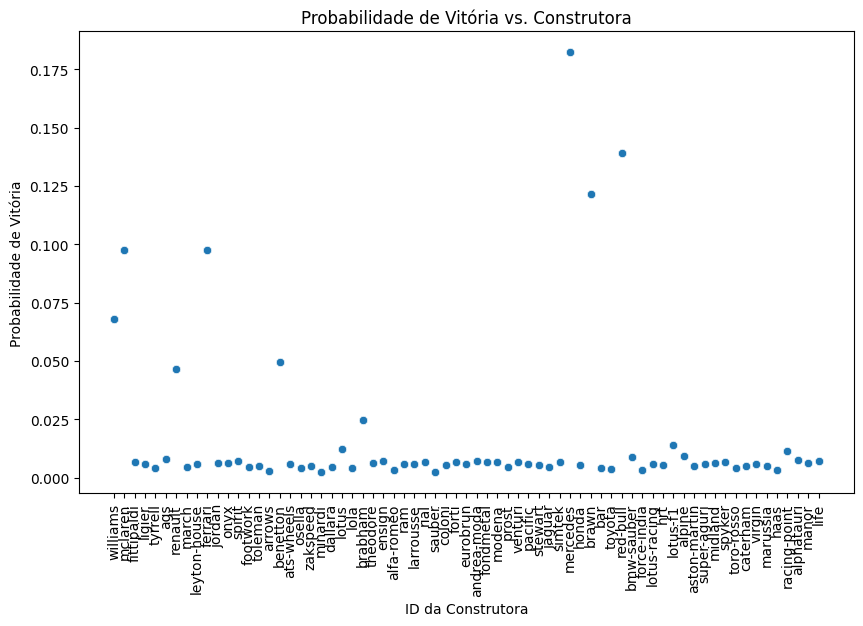

In [ ]:
dfPilotoPais = dfPilotoPais.query('year_x > 1980')

dfPilotoPais['win'] = np.where(dfPilotoPais['positionDisplayOrder'] <= 1, 1, 0)

X = dfPilotoPais[['constructorId']]
X = pd.get_dummies(X, drop_first=True)
y = dfPilotoPais['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

dfPilotoPais['win_prob'] = model.predict_proba(X)[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='constructorId', y='win_prob', data=dfPilotoPais)
plt.title('Probabilidade de Vitória vs. Construtora')
plt.xlabel('ID da Construtora')
plt.ylabel('Probabilidade de Vitória')
plt.xticks(rotation=90)
plt.show()

Percebe que as construtoras mais vitoriosas dos tempos atuais possuem os valores mais altos, Mercedes, Red Bull, Ferrari e McLaren. A equipe Brawn também está presente mas está já não participa mais nas corridas de hoje.

Agora, será aplicado o algoritmo de K-Means com os dados de circuito, construtora, fabricante de pneu, fabricante de motor e nacionalidade para tentar gerar mais um modelo de entendimento dos dados.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


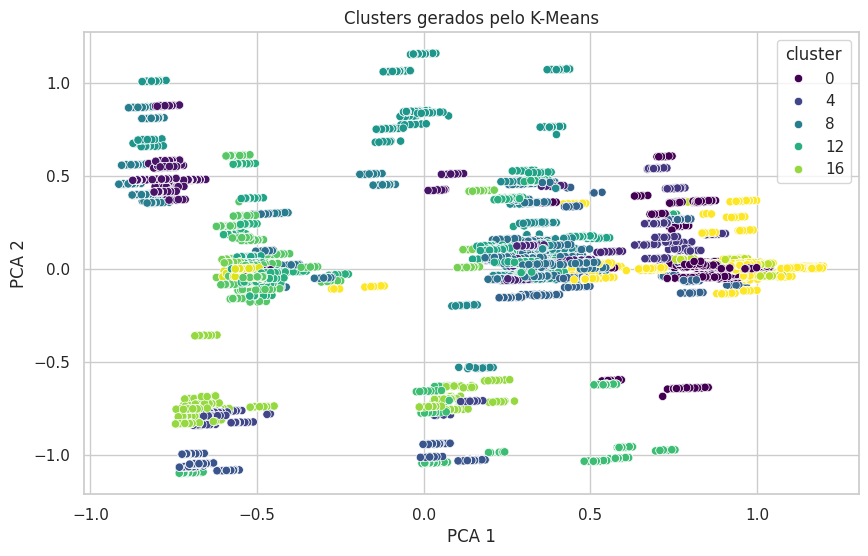

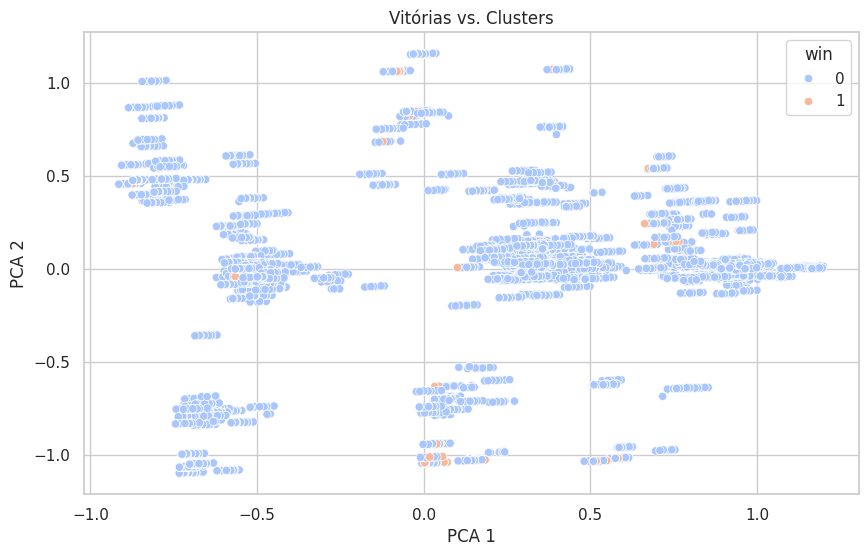

cluster
0      12
1       3
2       8
3      71
4       0
5      48
6       0
7       0
8     116
9       5
10     85
11     20
12      5
13     93
14      4
15     50
16      0
17      0
18     63
19     18
Name: win, dtype: int64


In [ ]:
dfPilotoPais = dfPilotoPais.query('year_x > 1990')

dfPilotoPais['win'] = np.where(dfPilotoPais['positionDisplayOrder'] <= 1, 1, 0)
X = dfPilotoPais[['idCircuit', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId', 'nationalityCountryId']]
X = pd.get_dummies(X, drop_first=True)

kmeans = KMeans(n_clusters=20, random_state=42)
dfPilotoPais['cluster'] = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

dfPilotoPais['pca_1'] = X_pca[:, 0]
dfPilotoPais['pca_2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=dfPilotoPais, palette='viridis')
plt.title('Clusters gerados pelo K-Means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='win', data=dfPilotoPais, palette='coolwarm')
plt.title('Vitórias vs. Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

cluster_win_count = dfPilotoPais.groupby('cluster')['win'].sum()
print(cluster_win_count)

Agora, será aplicado o algoritmo de KNN para encontrar mais um modelo para os dados, mas desse vez será testados o conjunto potência das variáveis, para encontrarmos o conjunto dessas que melhor pode estimar um bom desempenho na corrida (Top3).

In [ ]:
def treinar_e_avaliar_knn(df, variaveis_independentes, p=2, test_size=0.2, random_state=42):
    """
    Treina e avalia um modelo KNN usando as variáveis independentes especificadas e distância de Minkowski.
    Retorna a matriz de confusão e os valores de precisão e revocação.

    :param df: DataFrame contendo os dados
    :param variaveis_independentes: Lista com os nomes das colunas que serão usadas como variáveis independentes
    :param p: Valor para a distância de Minkowski (p=1 para Manhattan, p=2 para Euclidiana, etc.)
    :param test_size: Proporção do conjunto de dados a ser usado para teste
    :param random_state: Semente para a divisão do conjunto de dados
    :return: Matriz de confusão, precisão e revocação
    """
    df = df.query('year_x > 1990')
    df['win'] = np.where(df['positionDisplayOrder'] <= 3, 1, 0) #selecionando para o top3

    X = df[variaveis_independentes]
    X = pd.get_dummies(X, drop_first=True)
    y = df['win']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Normalizando os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Treinando o modelo KNN
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=p)
    knn.fit(X_train, y_train)

    # Prevendo os resultados para o conjunto de teste
    y_pred = knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (np.nan, np.nan, np.nan, np.nan)
    precision_0 = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    recall_0 = tn / (tn + fn) if (tn + fn) > 0 else np.nan
    precision_1 = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    recall_1 = tp / (tp + fp) if (tp + fp) > 0 else np.nan

    return cm, precision_0, recall_0, precision_1, recall_1

def criar_tabela_matriz_confusao(df, variaveis_independentes, p=2):
    """
    Cria uma tabela com todas as combinações possíveis de variáveis independentes e os valores da matriz de confusão.

    :param df: DataFrame contendo os dados
    :param variaveis_independentes: Lista com todos os nomes das colunas que podem ser usadas como variáveis independentes
    :param p: Valor para a distância de Minkowski (p=1 para Manhattan, p=2 para Euclidiana, etc.)
    :return: DataFrame com a tabela dos resultados
    """
    resultados = []

    for i in range(1, len(variaveis_independentes) + 1):
        for subset in combinations(variaveis_independentes, i):
            variaveis_subset = list(subset)
            cm, precision_0, recall_0, precision_1, recall_1 = treinar_e_avaliar_knn(df, variaveis_subset, p=p)

            tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (np.nan, np.nan, np.nan, np.nan)
            resultados.append([
                ', '.join(variaveis_subset), tn, fp, fn, tp,
                precision_0, recall_0,
                precision_1, recall_1
            ])

    tabela_resultados = pd.DataFrame(resultados, columns=[
        'Variáveis Independentes', 'TN', 'FP', 'FN', 'TP',
        'Precisão 0', 'Revocação 0',
        'Precisão 1', 'Revocação 1'
    ])
    return tabela_resultados


variaveis_independentes = ['idCircuit', 'idRace', 'year_x', 'grandPrixId', 'round', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId', 'nationalityCountryId']
tabela = criar_tabela_matriz_confusao(dfPilotoPais, variaveis_independentes, p=2)
print(tabela)


                                Variáveis Independentes    TN   FP   FN   TP  \
0                                             idCircuit  2265   18  378    2   
1                                                idRace  2248   35  380    0   
2                                                year_x  2160  123  359   21   
3                                           grandPrixId  2283    0  380    0   
4                                                 round  2283    0  380    0   
...                                                 ...   ...  ...  ...  ...   
1018  idCircuit, idRace, year_x, round, driverId, co...  2135  148  235  145   
1019  idCircuit, idRace, grandPrixId, round, driverI...  2123  160  249  131   
1020  idCircuit, year_x, grandPrixId, round, driverI...  2124  159  249  131   
1021  idRace, year_x, grandPrixId, round, driverId, ...  2138  145  239  141   
1022  idCircuit, idRace, year_x, grandPrixId, round,...  2125  158  249  131   

      Precisão 0  Revocação 0  Precisão

In [ ]:
import pandas as pd

def escolher_melhores_agrupamentos(tabela_resultados, peso_precision=0.5, peso_recall=0.5):
    """
    Escolhe os melhores agrupamentos com base nas métricas de precisão e revocação.

    :param tabela_resultados: DataFrame contendo os resultados dos testes
    :param peso_precision: Peso para a precisão na pontuação
    :param peso_recall: Peso para a revocação na pontuação
    :return: DataFrame com os melhores agrupamentos
    """
    tabela_resultados['Precision 0 Normalizado'] = (tabela_resultados['Precisão 0'] - tabela_resultados['Precisão 0'].min()) / (tabela_resultados['Precisão 0'].max() - tabela_resultados['Precisão 0'].min())
    tabela_resultados['Recall 0 Normalizado'] = (tabela_resultados['Revocação 0'] - tabela_resultados['Revocação 0'].min()) / (tabela_resultados['Revocação 0'].max() - tabela_resultados['Revocação 0'].min())
    tabela_resultados['Precision 1 Normalizado'] = (tabela_resultados['Precisão 1'] - tabela_resultados['Precisão 1'].min()) / (tabela_resultados['Precisão 1'].max() - tabela_resultados['Precisão 1'].min())
    tabela_resultados['Recall 1 Normalizado'] = (tabela_resultados['Revocação 1'] - tabela_resultados['Revocação 1'].min()) / (tabela_resultados['Revocação 1'].max() - tabela_resultados['Revocação 1'].min())

    # pontuação para cada agrupamento
    tabela_resultados['Pontuação'] = (
        peso_precision * (tabela_resultados['Precision 0 Normalizado'] + tabela_resultados['Precision 1 Normalizado']) / 2 +
        peso_recall * (tabela_resultados['Recall 0 Normalizado'] + tabela_resultados['Recall 1 Normalizado']) / 2
    )

    melhores_agrupamentos = tabela_resultados.sort_values(by='Pontuação', ascending=False)

    return melhores_agrupamentos

melhores_agrupamentos = escolher_melhores_agrupamentos(tabela)

pd.set_option('display.max_colwidth', None)  # Exibir todas as colunas sem truncamento
print(melhores_agrupamentos[['Variáveis Independentes', 'Pontuação']].head(20))

                                                                             Variáveis Independentes  \
310                                       idRace, driverId, tyreManufacturerId, nationalityCountryId   
111                                                             idRace, driverId, tyreManufacturerId   
22                                                                                  idRace, driverId   
274                                              idRace, year_x, constructorId, engineManufacturerId   
578                        idRace, driverId, constructorId, tyreManufacturerId, nationalityCountryId   
307                                            idRace, driverId, constructorId, nationalityCountryId   
23                                                                             idRace, constructorId   
580            idRace, constructorId, engineManufacturerId, tyreManufacturerId, nationalityCountryId   
115                                                      idRace,

In [ ]:
#MELHOR AGRUPAMENTO
var = treinar_e_avaliar_knn(dfPilotoPais, ['idRace', 'driverId', 'tyreManufacturerId', 'nationalityCountryId'], p=2, test_size=0.2, random_state=42)
var

(array([[2139,  144],
        [ 179,  201]]),
 0.9369250985545335,
 0.9227782571182054,
 0.5289473684210526,
 0.5826086956521739)

A partir desse modelo utilizando KNN foi possível verificar quais variáveis podem ser caracterizadas como mais importantes para se alcançar o top-3 de uma corrida.

As variáveis que mais aparecem nos modelos com pontuação mais alta foram:

Piloto, nacionalidade, pista, fornecedor de pneu e fornecedor de motor. Sendo que o conjunto dessas 4 primeiras formaram o conjunto com melhor resultado dentro do KNN.

CONCLUSÃO DO TRABALHO

Neste projeto, exploramos várias hipóteses relacionadas ao desempenho dos pilotos de Fórmula 1 em diferentes cenários, como pit stops, idade, nacionalidade, construtoras, marca do motor, marca de pneu etc.
Após a apresentação de toda a análise, podemos destacar que existem características que aumentam a probabilidade de um competidor se consagrar dentro do melhores corredores dentro uma corrida, como os atributos discutidos anteriormente dentro do KNN.

Mesmo que não tenha sido possível encontrar um modelo que tenha uma precisão muito alta com relação aos melhores foi possível encontrar um modelo robusto o suficiente para gerar analisar e compreender melhor os aspectos técnicos da Fórmula 1 no que tange à atributos necessários para alcançar bons resultados.

Com este trabalho foi possível notar como a análise de dados é uma ferramenta poderosa para extrair insights valiosos e informações importantes acerca de uma base de dados, possibilitando análises de previsão de dados e tomadas de decisões mais assertivas.